<a href="https://colab.research.google.com/github/Syam-Sankar768/Leaf-Diease-Detection/blob/main/leaf_disease_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Building CNN Model & Pretraining Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout

# Downlaod Model
import pickle

In [ ]:
path_folder = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
class_name = os.listdir(path_folder)
class_name.sort()
class_name = class_name[:4] + class_name[20:23]
print(class_name)
image_data = []
label_data = []
count = 0
for folder in class_name:
    images = os.listdir(path_folder + "/" + folder)
    print("Loading Folder -- {} " .format(folder), "The Count of Classes ==> ",count)
    for img in images:
        image = cv2.imread(path_folder + "/" + folder + "/" + img)
        image = cv2.resize(image, (100, 100))

        image_data.append(image)
        label_data.append(count)
    count += 1
print("---- Done ----------- ")


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
Loading Folder -- Apple___Apple_scab  The Count of Classes ==>  0
Loading Folder -- Apple___Black_rot  The Count of Classes ==>  1
Loading Folder -- Apple___Cedar_apple_rust  The Count of Classes ==>  2
Loading Folder -- Apple___healthy  The Count of Classes ==>  3
Loading Folder -- Potato___Early_blight  The Count of Classes ==>  4
Loading Folder -- Potato___Late_blight  The Count of Classes ==>  5
Loading Folder -- Potato___healthy  The Count of Classes ==>  6
---- Done ----------- 


In [ ]:
data = np.array(image_data)
data = data.astype("float32")
data = data/255.0

label = np.array(label_data)

In [ ]:
print(data.shape)

(13473, 100, 100, 3)


In [ ]:
label_num = to_categorical(label, len(class_name))
label_num[100]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x_img, y_img = shuffle(data, label_num)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10778, 100, 100, 3), (10778, 7), (2695, 100, 100, 3), (2695, 7))

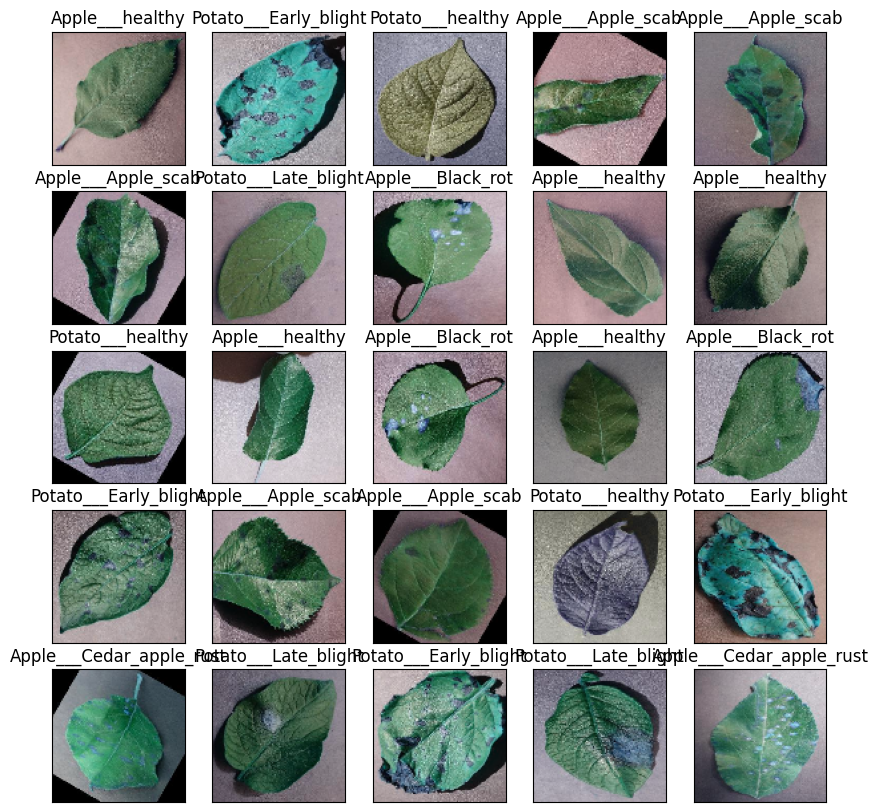

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

In [ ]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(100, 100, 3), padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="relu",  padding="same"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.AveragePooling2D((2, 2)))


model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(32, activation="relu"))
model.add(k.layers.Dropout(0.2))

model.add(k.layers.Dense(7, activation="softmax"))

model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 average_pooling2d (Average  (None, 50, 50, 16)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        8224      
                                                                 
 average_pooling2d_1 (Avera  (None, 25, 25, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 64)        0

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), validation_split=0.4)

Epoch 1/50
337/337 [==============================] - 175s 511ms/step - loss: 1.3715 - accuracy: 0.4749 - val_loss: 0.9038 - val_accuracy: 0.6835
Epoch 2/50
337/337 [==============================] - 169s 503ms/step - loss: 0.8934 - accuracy: 0.6836 - val_loss: 0.5418 - val_accuracy: 0.8059
Epoch 3/50
337/337 [==============================] - 170s 505ms/step - loss: 0.6892 - accuracy: 0.7594 - val_loss: 0.5337 - val_accuracy: 0.8167
Epoch 4/50
337/337 [==============================] - 161s 477ms/step - loss: 0.5302 - accuracy: 0.8217 - val_loss: 0.3570 - val_accuracy: 0.8809
Epoch 5/50
337/337 [==============================] - 159s 471ms/step - loss: 0.4283 - accuracy: 0.8559 - val_loss: 0.2595 - val_accuracy: 0.9117
Epoch 6/50
337/337 [==============================] - 168s 498ms/step - loss: 0.3673 - accuracy: 0.8781 - val_loss: 0.2541 - val_accuracy: 0.9184
Epoch 7/50
337/337 [==============================] - 168s 500ms/step - loss: 0.2872 - accuracy: 0.9077 - val_loss: 0.3511 -

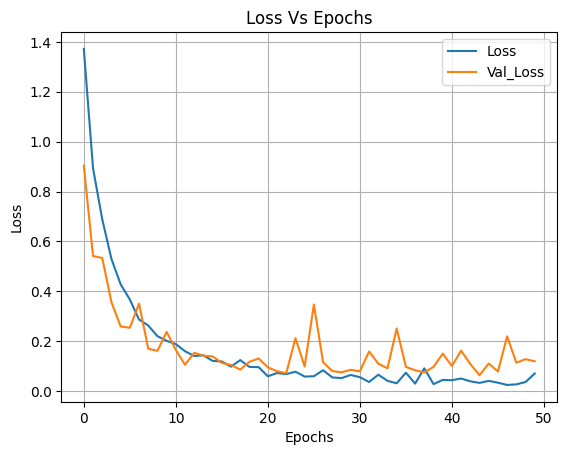

In [ ]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

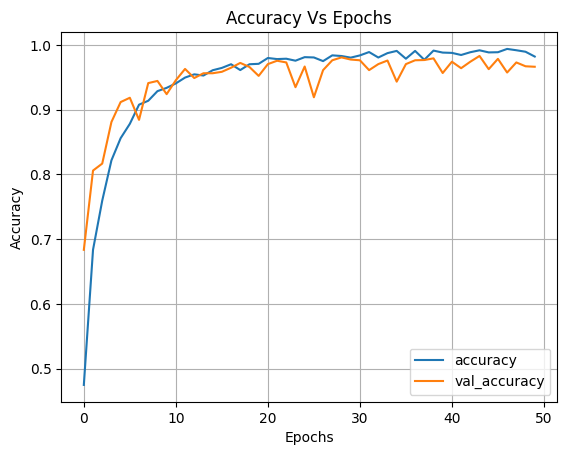

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")

85/85 [==============================] - 13s 157ms/step - loss: 0.1198 - accuracy: 0.9662
The Accuracy Testing Data is ==> 0.9662337899208069 %
The loss Testing Data is ==> 0.11982312798500061
